## 포트폴리오관리(고유 포트폴리오 찾기) 

* 포트폴리오 관리는 위험 조정 수익을 극대화하기 위해 자본을 여러 자산 클래스에 배분하는 것 

자산 배분에 가장 범용적으로 사용되는 기술이 평균 분산 포트폴리오 최적화이다. 이 방법은 추정된 공분산 행렬과 생각하는 자산의 기대 수익률을 이용한다. 그러나 재무 수익의 불규칙한 속성으로 이러한 입력에서 추정 오류가 발생하는데, 특히 배분되는 자산의 수에 비해 수익의 표본크기가 충분하지 않을 때 그렇다. 이러한 오류는 결과적인 포트폴리오의 최적성을 크게 위협해 좋지 않고 불안정한 결과를 초래한다.  

PCA를 사용해 n x n 공분산 행렬을 가져와서 자산과 해당 분산으로 구성된 n개의 선형 비상관 주요 포트폴리오 셋을 만들 수 있다. 공분산 행렬의 주성분은 자산 산의 공분산을 대부분 포함하며 상호 연관성은 없다. 또한 표준화된 주성분을 포트폴리오 가중치로 사용할 수 있으며, 이러한 주요 포트폴리오의 수익이 선형적으로 상관관계가 없음이 통계적으로 확인


### 문제정의 

* 주식 수익 데이터셋에 PCA를 사용해 주식 포트폴리오 위험 조정 수익을 극대화

#### 데이터 및 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('data/Dow_adjcloses.csv', index_col = 0)
df = data.copy()
df.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


* 다우존스 산업평균지수와 30개 종목으로 구성된 데이터 셋

## Preprocessing

In [4]:
df.shape

(4804, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4804 entries, 2000-01-03 to 2019-02-06
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MMM     4804 non-null   float64
 1   AXP     4804 non-null   float64
 2   AAPL    4804 non-null   float64
 3   BA      4804 non-null   float64
 4   CAT     4804 non-null   float64
 5   CVX     4804 non-null   float64
 6   CSCO    4804 non-null   float64
 7   KO      4804 non-null   float64
 8   DIS     4804 non-null   float64
 9   DWDP    363 non-null    float64
 10  XOM     4804 non-null   float64
 11  GS      4804 non-null   float64
 12  HD      4804 non-null   float64
 13  IBM     4804 non-null   float64
 14  INTC    4804 non-null   float64
 15  JNJ     4804 non-null   float64
 16  JPM     4804 non-null   float64
 17  MCD     4804 non-null   float64
 18  MRK     4804 non-null   float64
 19  MSFT    4804 non-null   float64
 20  NKE     4804 non-null   float64
 21  PFE     4804 non-null   flo

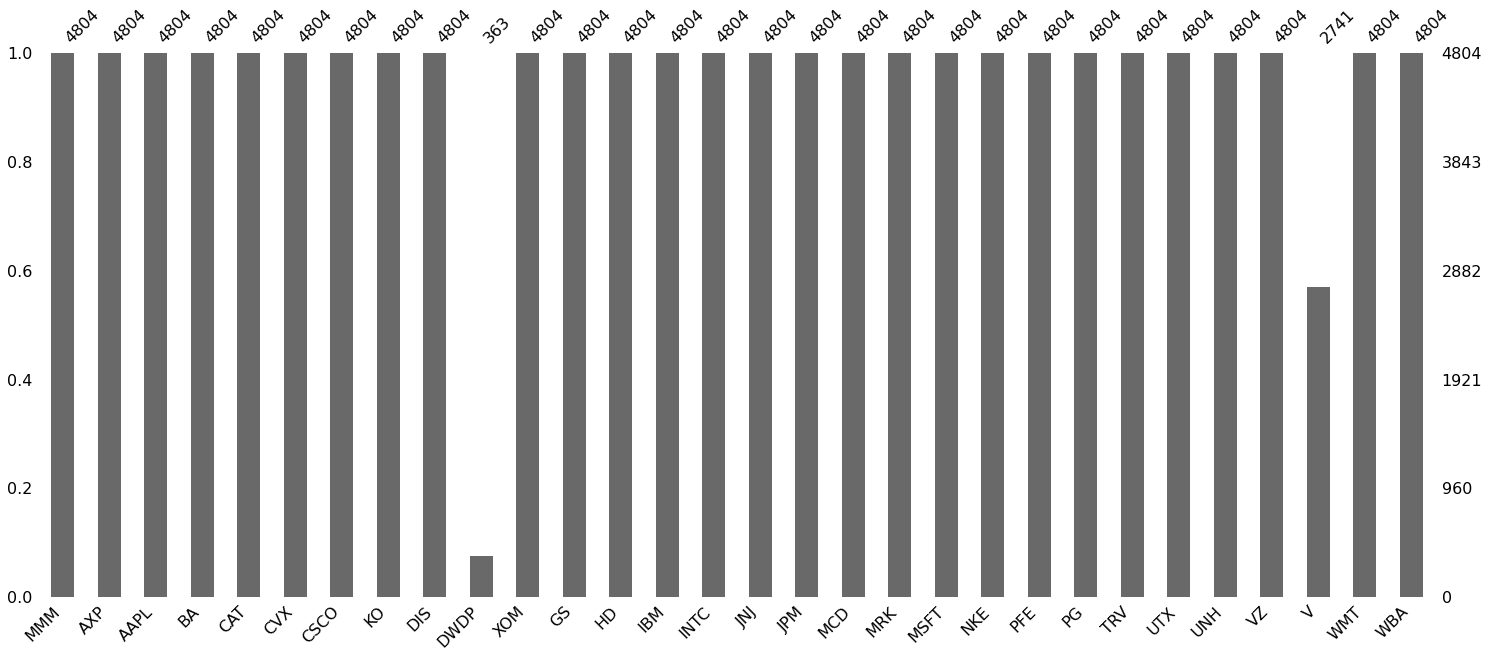

In [6]:
import missingno as msno

msno.bar(df)
plt.show()

In [7]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: DWDP입니다
해당 컬럼에 총 4441개의 결측치가 존재합니다.
결측치가 있는 컬럼은: V입니다
해당 컬럼에 총 2063개의 결측치가 존재합니다.


In [8]:
# 결측값이 30% 이상인 항목은 삭제 

missing_fractions = df.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

df.drop(labels=drop_list, axis=1, inplace=True)
df.shape

(4804, 28)

In [9]:
# 누락된 값을 데이터셋에서 사용 가능한 마지막 값으로 채움 

df = df.fillna(method = 'ffill')

## EDA

In [10]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
MMM,4804.0,86.77,53.94,25.14,51.19,63.51,122.91,251.98
AXP,4804.0,49.66,22.56,8.71,34.08,42.27,66.82,112.42
AAPL,4804.0,49.11,55.02,0.83,3.90,23.32,84.01,231.26
BA,4804.0,85.48,79.08,17.46,37.41,58.44,113.00,411.11
CAT,4804.0,56.70,34.66,9.25,26.34,53.05,76.49,166.83
CVX,4804.0,61.74,31.71,17.57,31.82,56.94,91.69,128.68
CSCO,4804.0,21.65,10.07,6.84,14.91,18.58,24.65,63.70
KO,4804.0,24.98,10.61,11.70,15.42,20.56,34.93,50.40
DIS,4804.0,46.37,32.73,11.02,22.04,29.52,75.83,117.97
XOM,4804.0,54.74,20.69,19.49,33.38,57.19,73.71,88.85


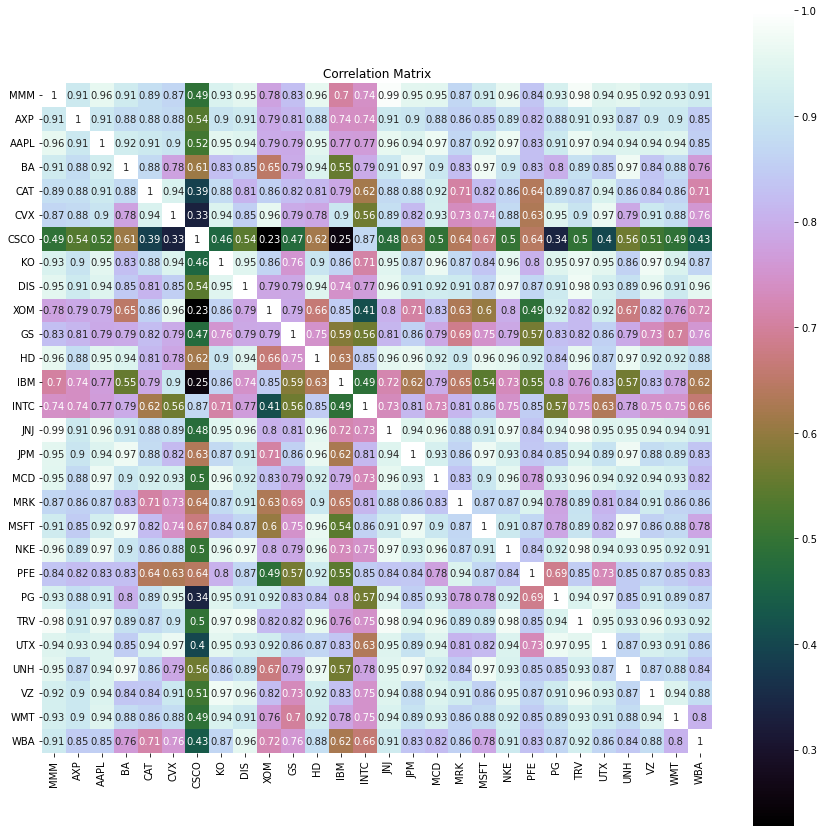

In [11]:
# correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.show()

In [12]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = df.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
datareturns.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.017595,0.009056,-0.051151,-0.015793,-0.015710,-0.009331,-0.030055,0.034008,0.010312,0.011940,...,-0.025657,0.050113,-0.001742,0.016393,-0.011299,-0.023209,0.002158,-0.009402,-0.014870,0.039649
2000-01-20,-0.037243,0.016790,0.065128,-0.023725,-0.044210,-0.005003,0.000890,0.009655,-0.032230,-0.021856,...,-0.009346,-0.023670,-0.016486,-0.024263,-0.005486,-0.022739,0.025210,0.003123,-0.010615,0.000000
2000-02-02,-0.017316,-0.028402,-0.014364,0.020114,0.005788,-0.006732,-0.033107,-0.030105,0.034722,0.007453,...,-0.020692,0.016063,-0.027027,-0.008744,-0.048789,0.001118,0.026451,-0.004197,-0.005282,0.004512
2000-02-03,-0.008757,-0.007917,0.045542,-0.026664,-0.026013,-0.014402,0.034241,-0.020043,0.016913,-0.017062,...,0.027874,0.009275,-0.010278,-0.008314,-0.044835,-0.015070,-0.008948,-0.014669,0.000000,-0.002073
2000-02-04,-0.028684,-0.009208,0.045397,0.012891,0.000000,-0.035363,0.028014,0.018100,0.006600,-0.018208,...,0.028373,-0.024854,0.003368,-0.031285,0.004506,-0.029467,0.024738,0.002053,-0.035457,0.010734


## Data Transformation

누락된 값을 처리할 뿐 아니라 데이터셋 특성을 단위 척도 (평균 = 0, 분산 = 1)로 표준화, PCA를 적용하기 전에 모든 변수가 동일한 척도상에 있어야함, 그렇지 않으면 큰 값을 가진 특성이 결과를 지배한다. 

In [13]:
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns) ,
                               columns = datareturns.columns, index = datareturns.index)

# 변환된 데이터 요약 
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713383,0.565603,-2.707674,-1.133045,-1.041247,-0.787063,-1.834413,3.568833,0.725353,0.981056,...,-1.936268,3.666524,-0.172523,1.771791,-0.936081,-1.954189,0.076018,-0.836288,-1.374665,2.942150
2000-01-20,-3.564118,1.077343,3.304005,-1.670108,-2.833568,-0.445782,0.021934,0.987042,-2.415069,-1.897394,...,-0.733208,-1.816361,-1.420880,-2.741513,-0.475716,-1.915682,1.653794,0.241016,-0.987037,-0.035748


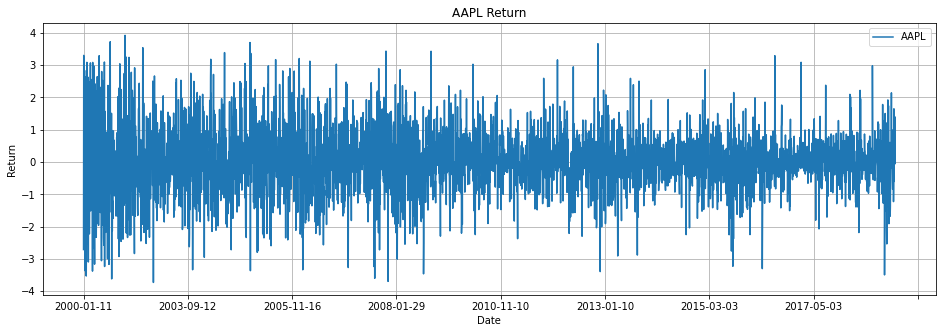

In [14]:
# DJIA에 대한 로그 반환 시각화

plt.figure(figsize=(16, 5))
plt.title("AAPL Return")
plt.ylabel("Return")
rescaledDataset.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

## Evaluate Algorithms and Models

In [15]:
# Train Test Split

percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

### Model Evaluation- Applying Principle Component Analysis

In [16]:
pca  = PCA() 
PrincipalComponent=pca.fit(X_train)

In [17]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

## Explained Variance using PCA

,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


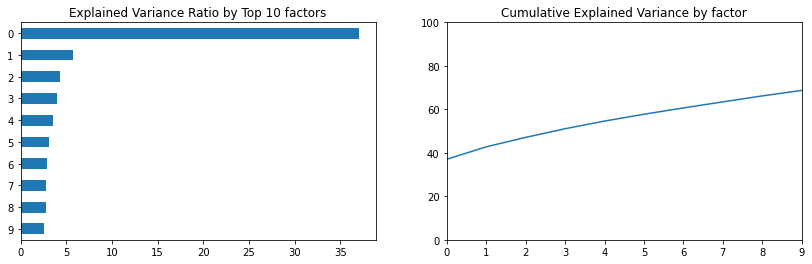

In [18]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

각 주성분이 설명하는 원본 데이터의 분산량 감소는 원본 특성간의 상관관계를 나타낸다.   
첫 번째 주성분은 원래 데이터에서 가장 큰 분산을 나타내고 두 번째 주성분은 그 다음으로 높은 분산을 나타내는 식이다.   
고윳값이 가장 낮은 고유 벡터는 데이터셋에서 최소 변동량을 설명한다. 


가장 중요한 요소가 일일 수익 변동의 약 40%를 설명한다. 이 지배적인 주성분은 일반적으로 '시장'요인으로 해석된다. 

## Looking at Portfolio weights

In [19]:
def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()
sum(pca.components_[0])

-5.247808242068631

In [20]:
weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

In [21]:
pca.components_[0]

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

In [22]:
 weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

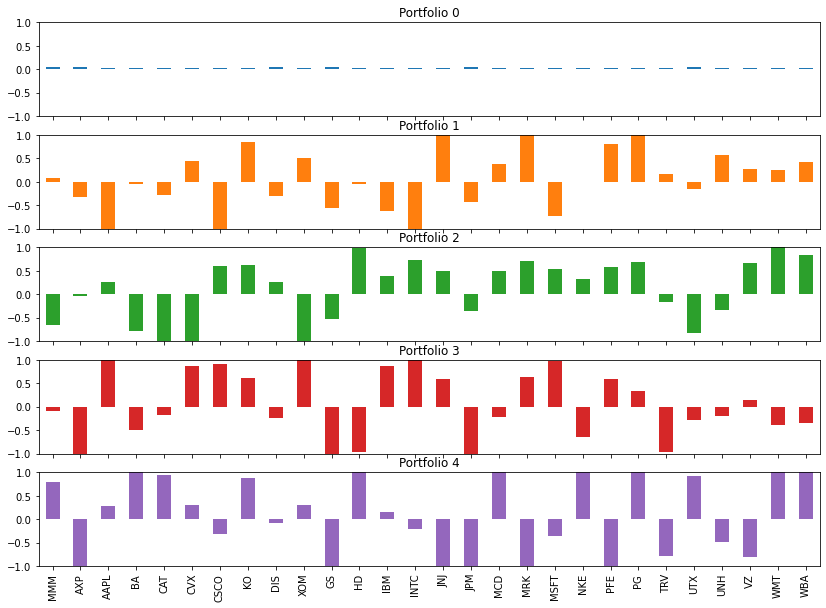

In [23]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=df.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

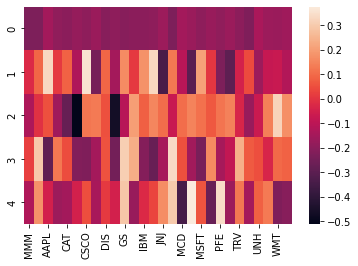

In [24]:
sns.heatmap(topPortfolios) 
plt.show()

히트맵과 막대 그래프는 각 고유 벡터에서 서로 다른 종목의 기여도를 보여준다.   
전통적으로 포트폴리오가 독립적인 위험 요소를 어느 정도 나타낸다는 것은 각각의 주요 포트폴리오를 통해 알 수 있다. 이러한 위험요소의 표현은 포트폴리오의 자산에 따라 달라진다. 분산이 가장 큰 주요 포트폴리오는 일반적으로 체계적인 위험요소(시장요소)이다. 첫번째 주성분(포트폴리오 0 )를 살펴보면 가중치가 종목 전체에 균일하게 분포되었음을 알 수 있다. 거의 동일한 가중치 포트폴리오는 지수 변동의 40%를 설명하며 체계적인 위험요소를 공정하게 표현 

나머지 고유 포트폴리오는 일반적으로는 부분 또는 산업요소에 해당. 

포트폴리오의 자산 범위가 확장되어 광법위한 글로벌 투자가 포함되면 국제 주식 위험, 금리 위험, 상품 노출, 지리적 위험, 기타 여러 요소를 식별 할 수 있다.

## Finding the Best Eigen Portfolio

최상의 고유 포트폴리오를 결정하기 위해 샤프비율을 사용한다. 샤프비율은 포트폴리오의 연간 변동서엥 대한 연간 수익을 설명하는 위험 조정 성과평가 방법이다. 높은 샤프 비율은 특정 포트폴리오의 수익이 높고 변동성이 낮음을 의미한다. 연간 샤프 비율은 연간 수익을 연간 변동성으로 나누어 계산한다.   

연간 수익의 경우 연간 기간과 관련하여 모든 수익의 기하학적 평균을 적용, 연간 변동성은 수익의 표준 편차에 연간 기간의 제곱근을 곱해 계산

In [25]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 11.47%, vol = 13.31%, Sharpe = 0.86
      Return       Vol    Sharpe
0   0.114739  0.133133  0.861838
7   0.095771  0.693481  0.138102
5   0.100020  0.844943  0.118375
1   0.056561  0.670429  0.084366
2  -0.106559  0.858820 -0.124076
11 -1.000000  7.227664 -0.138357
13 -0.399292  2.069889 -0.192905
25 -1.000000  5.009294 -0.199629
23 -1.000000  4.955034 -0.201815
6  -0.416203  1.967123 -0.211580
10 -0.157622  0.738399 -0.213465
3  -0.162130  0.738014 -0.219684
26 -0.999993  4.535175 -0.220497
8  -0.422215  1.396786 -0.302276
17 -0.998332  3.277252 -0.304625
24 -0.550144  1.728886 -0.318207
16 -0.980029  3.037992 -0.322591
21 -0.470440  1.420469 -0.331187
14 -0.886228  2.571136 -0.344684
27 -0.932511  2.605850 -0.357853


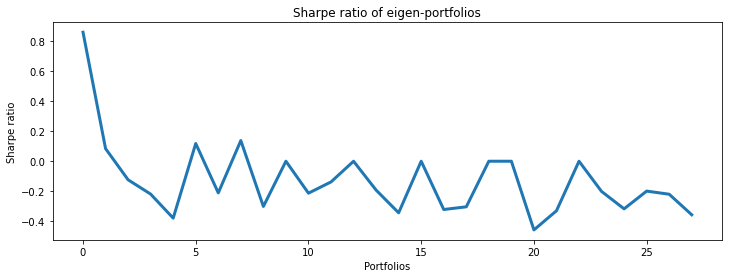

In [26]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


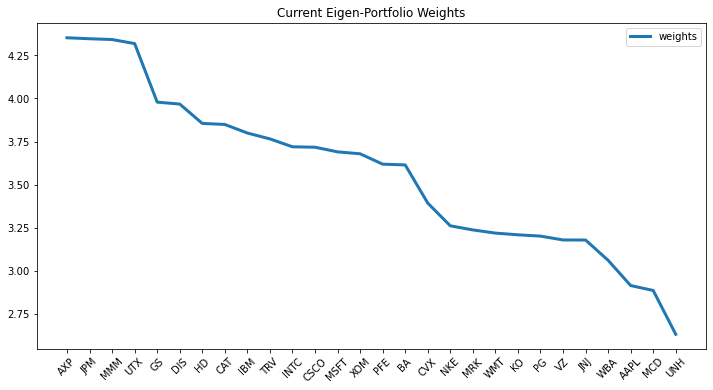

,weights
AXP,4.351486
JPM,4.345819
MMM,4.341287
UTX,4.317801
GS,3.978690
DIS,3.967455
HD,3.855280
CAT,3.849228
IBM,3.799613
TRV,3.765610


In [27]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

## Backtesting Eigenportfolio

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


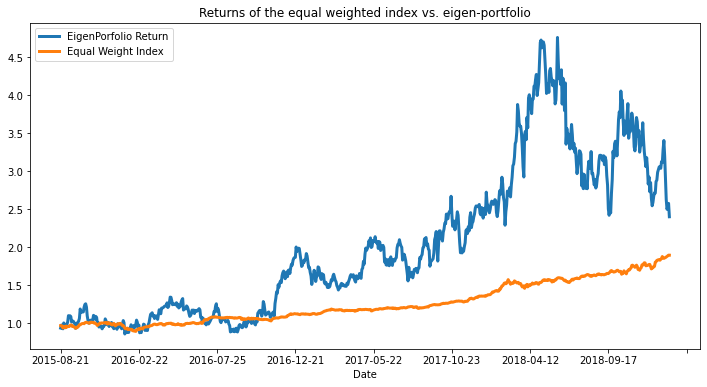

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


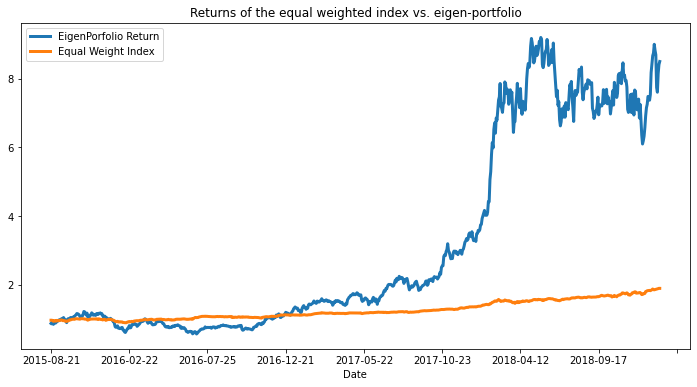

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


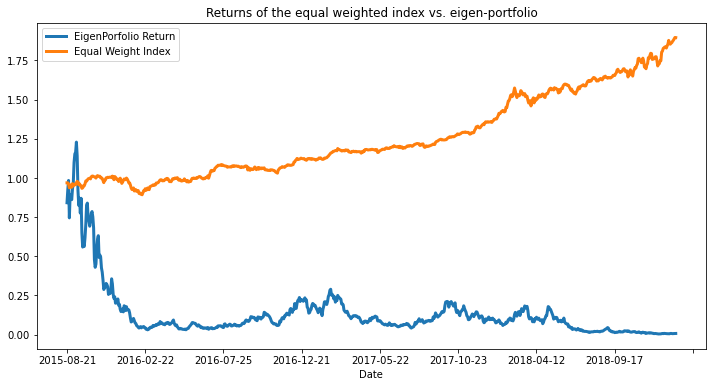

In [28]:
def Backtest(eigen):

    '''

    Plots Principle components returns against real returns.
    
    '''
   
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_raw * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()
    
Backtest(eigen=weights[5])
Backtest(eigen=weights[1])
Backtest(eigen=weights[14])

###  Conclusion
In terms of the intuition behind the eigen portfolios, we demonstrated that the first
eigen portfolio represents a systematic risk factor and other eigen portfolio may represent sector or industry factor. We discuss diversification benefits offered by the eigen
portfolios as they are derived using PCA and are independent.Looking at the backtesting result, the portfolio with the best result in the training set
leads to the best result in the test set. By using PCA, we get independent eigen portfo‐
lios with higher return and sharp ratio as compared to market.